# 13장 데이터 분석 예제
* https://github.com/wesm/pydata-book

## [13.2 무비렌즈의 영화 평점 데이터]
* 1990년대 말부터 2000년대 movieLens 사용자 6000여 명에게서 수집한 4000여 편의 영화 평점 1M 데이터 제공
  * 사용자 정보: 나이, 우편번호, 성별, 직업
  * 영화 평점 정보 : 장르, 개봉 연도
  * 영화 정보 : 장르, 제목
- Gender :
  * "M" : 남성
  * "F" : 여성
- Age :
	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"
- Occupation :
	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"
- Genres :
	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western


In [59]:
# 1. 필요한 라이브러리 임포트
import pandas as pd

In [60]:
# 데이터셋 로드
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

In [61]:
# 데이터셋 탐색
print(users.head())
print(ratings.head())
print(movies.head())

   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455
   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291
   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


## [데이터 분석 문제]

### # 성별에 따른 250건 이상의 평균 평점 정보가 있는 영화 추출하기

In [62]:
# (1) ratings 테이블과 users 테이블을 병합하기 -> 그 결과를 movies 테이블과 병합하기 : 1000209 rows × 10 columns
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


## pandas.pivot_table()
* 주어진 데이터프레임을 특정 열을 기준으로 그룹화하기
* 다양한 집계 함수를 사용하여 요약 통계를 계산
* 주요 파라미터
  * data : 피벗 테이블을 생성할 데이터프레임
  * values : 집계할 데이터 열
  * index: 피벗 테이블의 행으로 사용할 열
  * columns: 피벗 테이블의 열로 사용할 열
  * aggfunc: 집계함수 목록
  * fill_value: 결측값을 대체할 값

In [63]:
# (2) 성별에 따른 각 영화의 평균 평점을 집계하기
mean_ratings = pd.pivot_table(data = data, values = "rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [64]:
# (3) 영화 제목별 건수 집계하기
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [65]:
# (4) 250건 이상의 평점 정보가 있는 영화 제목 추출
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [66]:
# (5) 성별에 따른 250건 이상의 평점 정보가 있는 영화에 대한 색인 추출하기
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


### # 여성에게서 높은 평점을 받은 영화 목록 확인하기
* 성별에 따른 250건 이상의 평점 정보가 있는 영화

In [67]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


### # 남성에게서 높은 평점을 받은 영화 목록 확인하기
* 성별에 따른 250건 이상의 평점 정보가 있는 영화

In [68]:
top_male_ratings = mean_ratings.sort_values("M", ascending=False)
top_male_ratings.head()

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248


### # 남녀 간의 호불호가 갈리는 영화를 찾기
* 성별에 따른 250건 이상의 평점 정보가 있는 영화


In [69]:
# (1) mean_ratings에 평균 평점의 차이를 계산하기
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

In [70]:
# (2) 여성이 선호하는 영화 순서대로 정렬
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [71]:
# (3) 역순으로 정렬한 다음 남성이 선호하는 영화 확인하기
sorted_by_diff = mean_ratings.sort_values("diff", ascending=False)
sorted_by_diff.head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


### # 성별에 관계없이 영화에 대한 호불호가 극명하게 나뉘는 영화 찾기
* 호불호는 평점의 표준편차을 이용하여 측정
* 250건 이상의 평점 정보가 있는 영화

In [72]:
#(1) 영화별로 평점의 표준편차를 계산하고 평점이 250건 이상인 영화만 선택하기
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [73]:
# (2) 내림차순으로 정렬하여 호불호가 극명하게 갈리는 영화 10개 선정
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

### # 장르와 연령별로 그룹하여 평균 평점을 구하기

In [74]:
# 여러 장르에 속하는 영화일 경우 장르를 개별적으로 분리하기
movies["genre"] = movies.pop("genres").str.split("|")
movies.head() #         .pop() 장르에 가보면 복수개의 장르를 나눠서 새로운 칼럼 생성

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [75]:
# (2) 복수 장르에 속하는 영화을 각 장르별로 나누기
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [76]:
# (3) 세 테이블을 모두 병합하여 그룹화하기
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.head(20)

,movie_id,title,genre,user_id,rating,timestamp,gender,age,occupation,zip
0,1,Toy Story (1995),Animation,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation,10,5,978226474,F,35,1,95370
5,1,Toy Story (1995),Animation,18,4,978154768,F,18,3,95825
6,1,Toy Story (1995),Animation,19,5,978555994,M,1,10,48073
7,1,Toy Story (1995),Animation,21,3,978139347,M,18,16,99353
8,1,Toy Story (1995),Animation,23,4,978463614,M,35,0,90049
9,1,Toy Story (1995),Animation,26,3,978130703,M,25,7,23112


In [77]:
# (4) 장르와 연령별로 그룹하여 평균 평점을 구하기
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])
                 ["rating"].mean().unstack("age")
                 )
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


## [데이터사이언스]
* 선형회귀 분석
  * 각 장르별로 연령대와 평점 간의 관계를 분석하는 선형 회귀 모델을 구축하고, 그 성능을 비교
  * age를 독립 변수로, 각 장르별 평점을 종속 변수로 사용
  * from sklearn.linear_model import LinearRegression

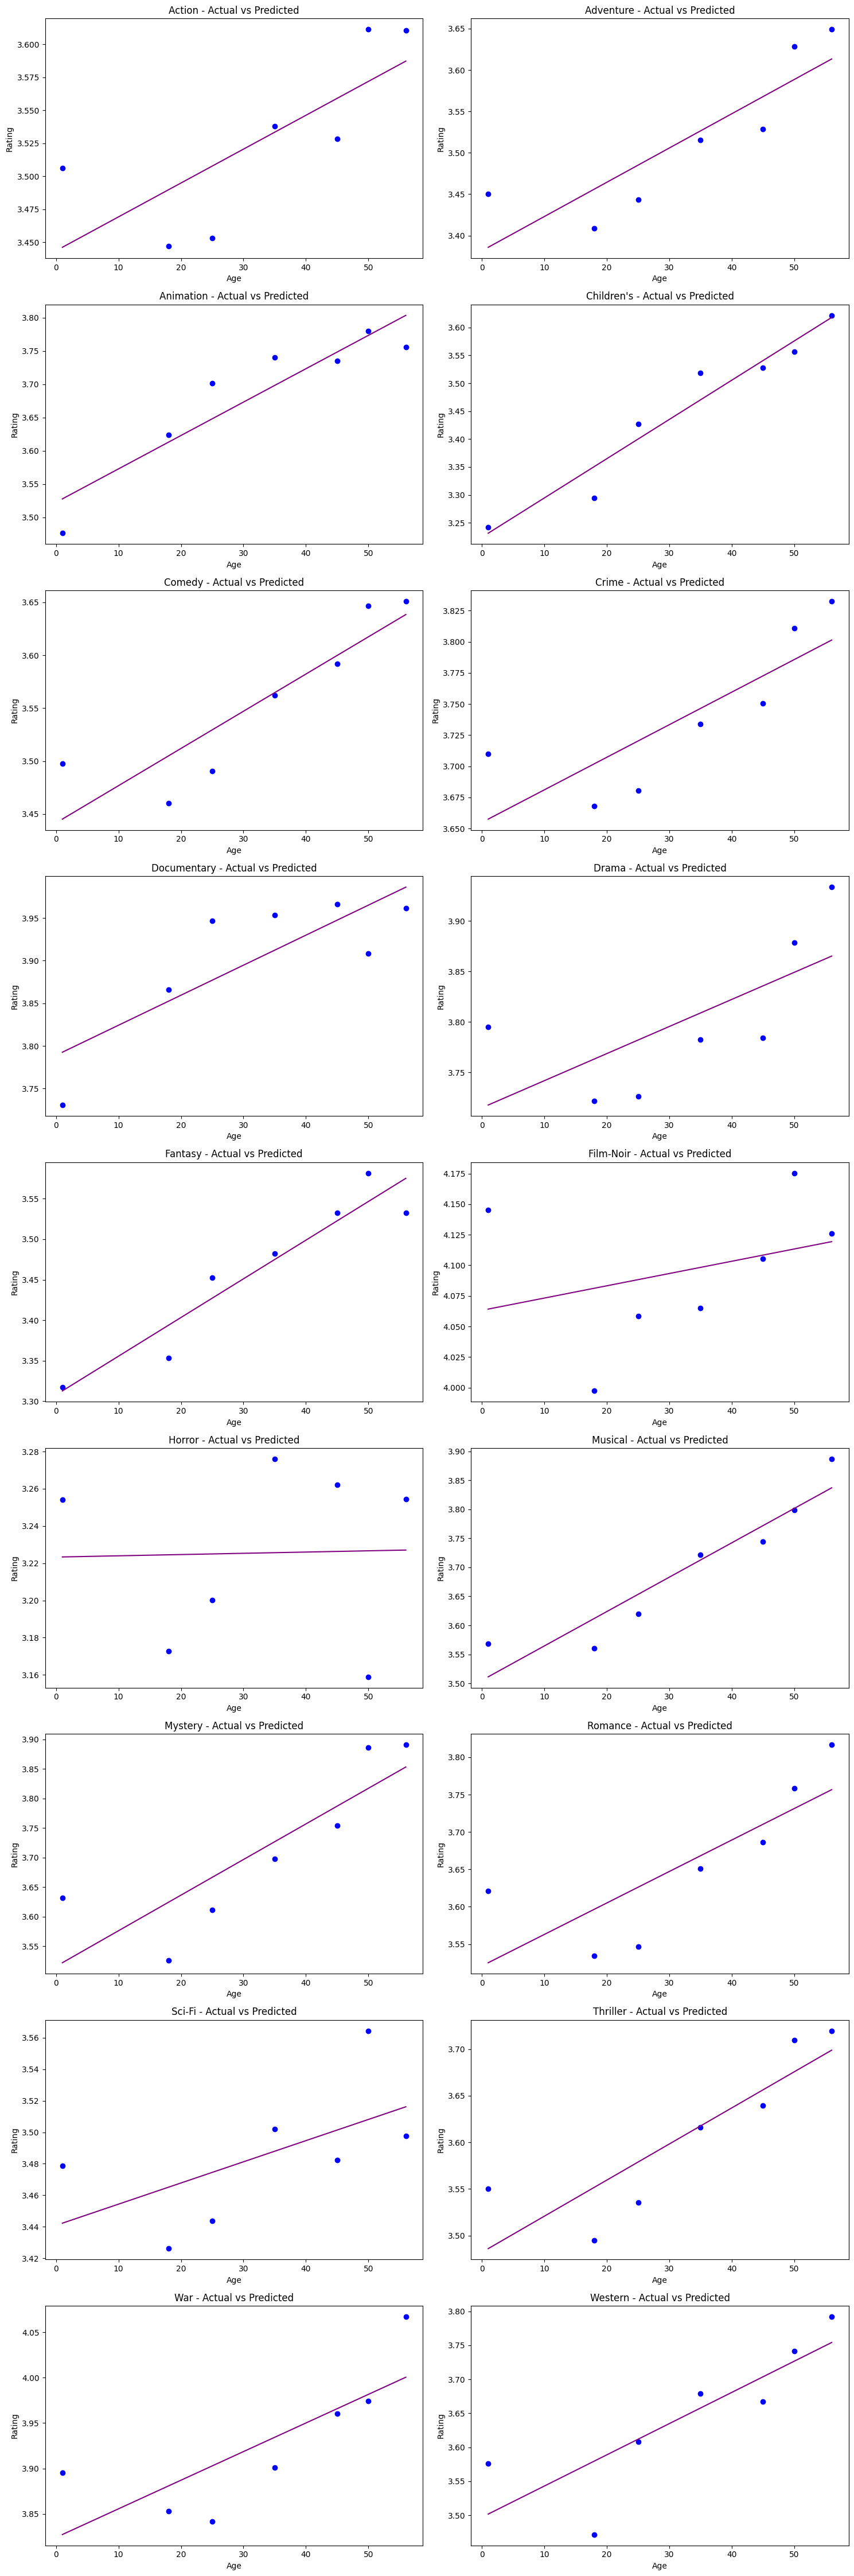

          genre       mse        r2
0        Action  0.001638  0.566914
1     Adventure  0.001804  0.755556
2     Animation  0.001409  0.853299
3    Children's  0.000985  0.942350
4        Comedy  0.001049  0.792751
5         Crime  0.001109  0.667427
6   Documentary  0.002112  0.656110
7         Drama  0.002799  0.455502
8       Fantasy  0.000778  0.904878
9     Film-Noir  0.002790  0.104910
10       Horror  0.001917  0.000767
11      Musical  0.001480  0.885220
12      Mystery  0.004705  0.715088
13      Romance  0.003519  0.621079
14       Sci-Fi  0.001124  0.343663
15     Thriller  0.001596  0.753488
16          War  0.002122  0.603866
17      Western  0.002960  0.698664


array([[<Axes: title={'center': 'mse'}, xlabel='genre'>],
       [<Axes: title={'center': 'r2'}, xlabel='genre'>]], dtype=object)

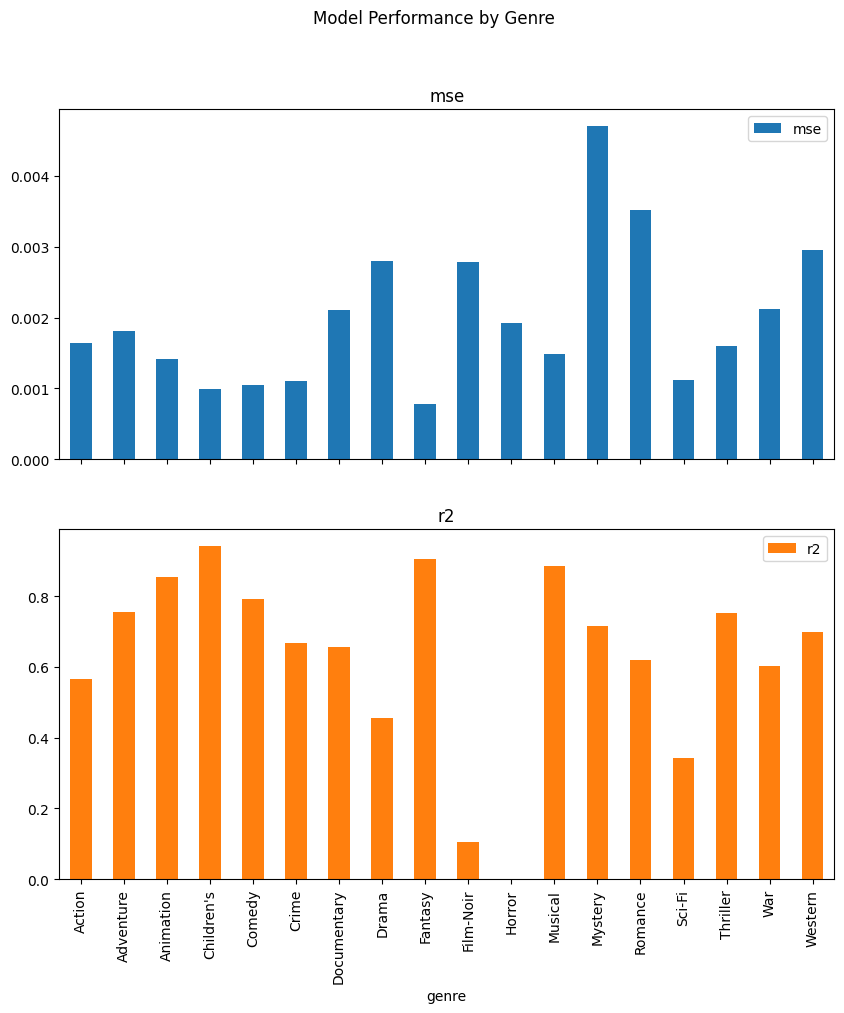

In [78]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# 데이터셋 데이터프레임 생성
df = genre_ratings
df.describe()

# age와 각 장르의 평점을 각각 독립 변수와 종속 변수로 설정
X = np.array([1, 18, 25, 35, 45, 50, 56]).reshape(-1, 1)
# y = df.loc[genre].values 

# # 각 장르에 대해 선형 회귀 모델을 훈련하고 평가
# model = LinearRegression()
# model.fit(X, y)
# y_pred = model.predict(X)

# # 모델의 성능을 MSE와 R^2 스코어로 측정
# mse = mean_squared_error(y, y_pred)
# r2 = r2_score(y, y_pred)

# results.append({
#     'genre': genre,
#     'mse': mse,
#     'r2': r2
# })


# subplots을 이용하여 각 장르에 대해 선형 회귀 모델을 훈련하고 실제값과 예측값 시각화
results = []
fig, axs = plt.subplots(nrows=9, ncols=2, figsize=(15, 45))
axs = axs.flatten()

for idx, genre in enumerate(df.index):
    y = df.loc[genre].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # 모델의 성능을 MSE와 R^2 스코어로 측정
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    results.append({
        'genre': genre,
        'mse': mse,
        'r2': r2
    })

    # 각 장르에 대해 실제 값과 예측 값을 시각화
    axs[idx].scatter(X, y, color='blue')
    axs[idx].plot(X, y_pred, color='purple')
    axs[idx].set_title(f'{genre} - Actual vs Predicted')
    axs[idx].set_xlabel('Age')
    axs[idx].set_ylabel('Rating')

plt.tight_layout()
plt.show()

# 모든 장르의 결과를 데이터프레임으로 정리
results_df = pd.DataFrame(results)
print(results_df)


# 결과 데이터프레임을 이용하여 MSE와 R^2 스코어를 막대그래프로 시각화
results_df.set_index('genre', inplace = True)
results_df[['mse', 'r2']].plot(kind = 'bar', subplots = True, layout = (2, 1), figsize = (10, 10),
                               title = "Model Performance by Genre")




## [데이터사이언스]
* 로지스틱회귀 분석
  * 각 장르별로 연령대와 평점 간의 관계를 "good("0") & bad("1")로 분류분석하는 로지스틱 회귀 모델을 구축하고, 그 성능을 비교
  * age를 독립 변수
  * 각 장르별 평점을 종속 변수 - 이진 변수로 설정
  * from sklearn.linear_model import LogisticRegression

Action:              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      0.80      0.73         5

    accuracy                           0.57         7
   macro avg       0.33      0.40      0.36         7
weighted avg       0.48      0.57      0.52         7

Adventure:              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Animation:              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00    

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

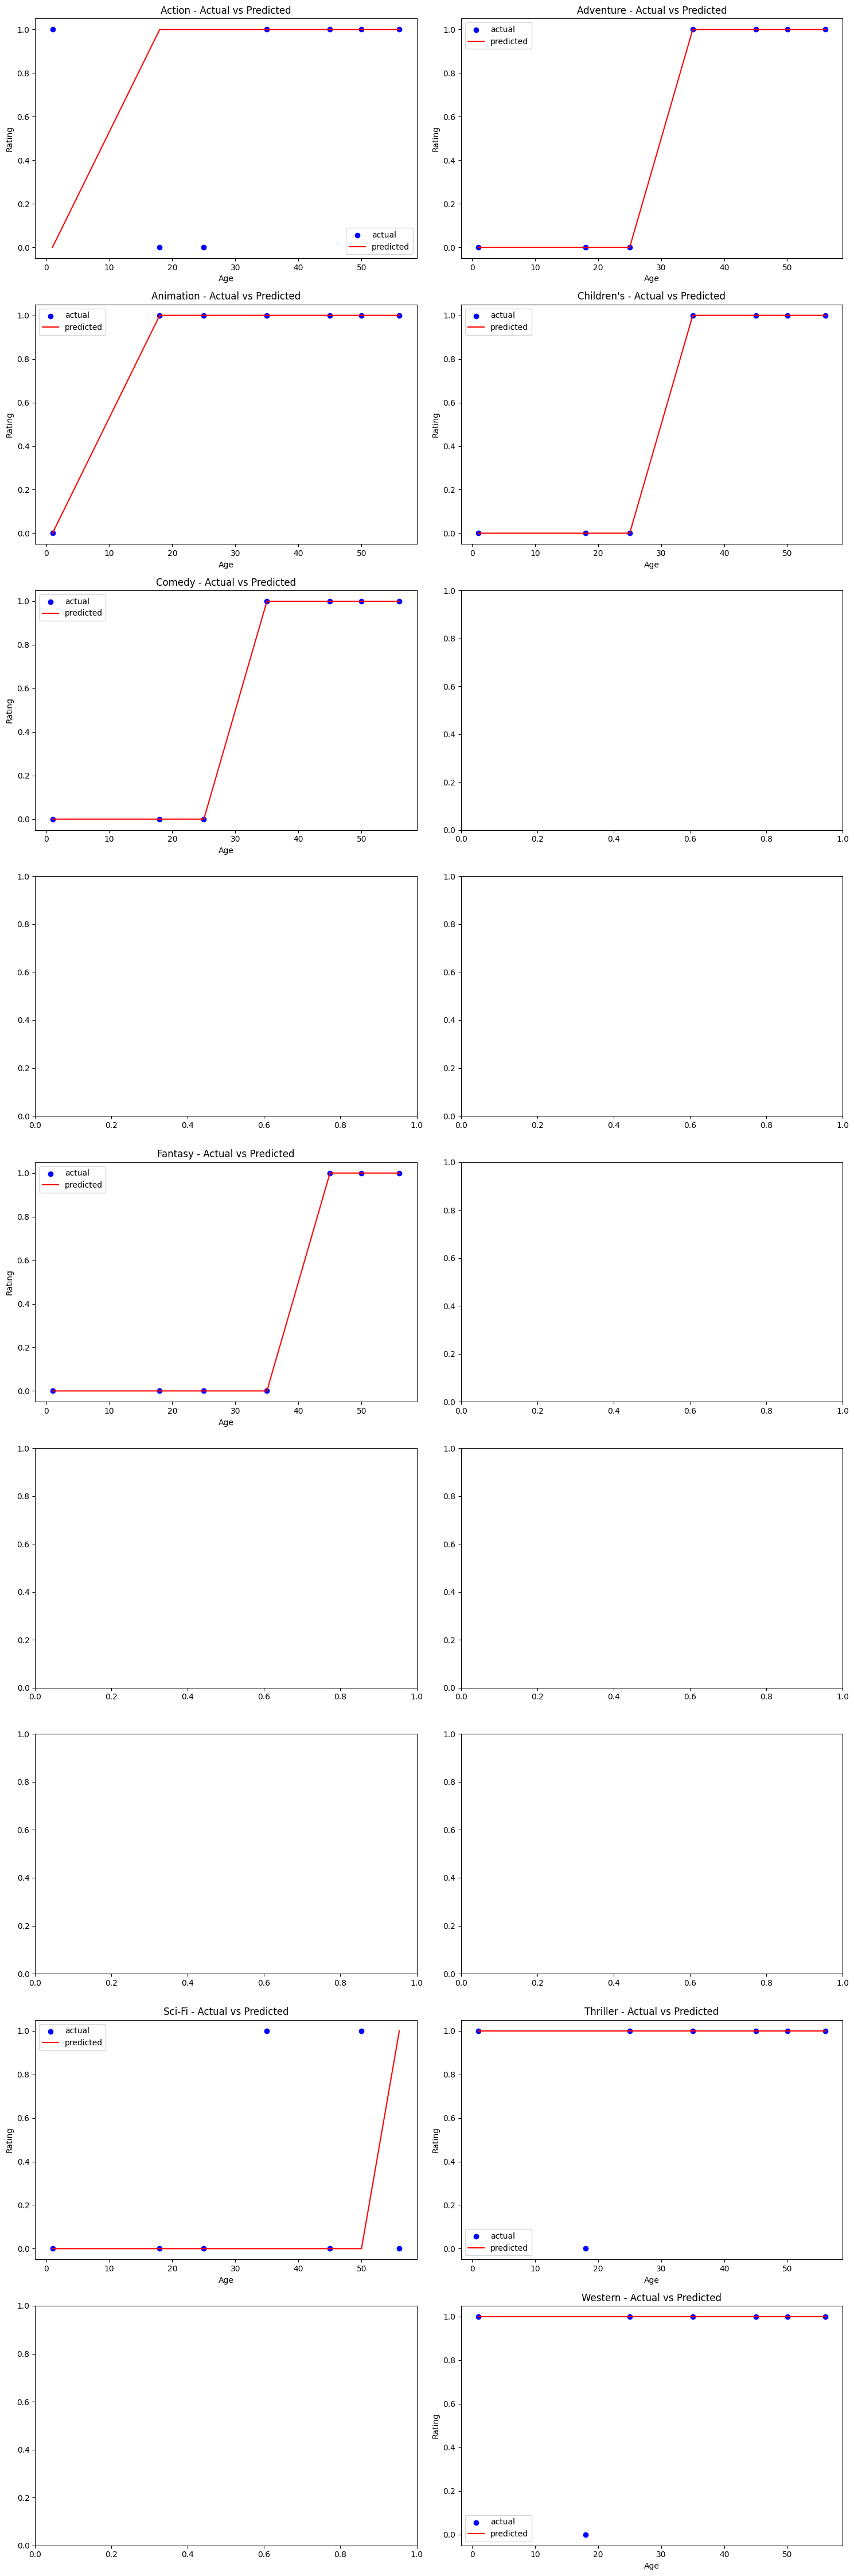

        genre  accuracy       conf_matrix
0      Action  0.571429  [[0, 2], [1, 4]]
1   Adventure  1.000000  [[3, 0], [0, 4]]
2   Animation  1.000000  [[1, 0], [0, 6]]
3  Children's  1.000000  [[3, 0], [0, 4]]
4      Comedy  1.000000  [[3, 0], [0, 4]]
5     Fantasy  1.000000  [[4, 0], [0, 3]]
6      Sci-Fi  0.571429  [[4, 1], [2, 0]]
7    Thriller  0.857143  [[0, 1], [0, 6]]
8     Western  0.857143  [[0, 1], [0, 6]]


KeyError: "None of [Index(['mse', 'r2'], dtype='object')] are in the [columns]"

In [82]:
# 분류문제로 변경
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 데이터 셋 : 데이터프레임 생성
df = genre_ratings

# 데이터 전처리
X = np.array([1, 18, 25, 35, 45, 50, 56]).reshape(-1, 1)
threshold = 3.5  # 기준

# 각 장르에 대해 로지스틱 회귀 모델을 훈련하고 평가결과 시각화
results = []

num_genres = len(df.index)
num_rows = (num_genres + 1) // 2

fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows)) 
axs = axs.flatten()

for idx, genre in enumerate(df.index):
    # 연속형 종속변수의 범주형 변수로 변환(이진변수)
    y = (df.loc[genre].values >= threshold).astype(int) # 0 or 1
    if len(np.unique(y)) < 2:
        print(f" {genre}: 단일 범주")
        continue

    
    # 로지스틱 회귀 모형의 지도학습 및 예측
    model = LogisticRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    

    # 모델의 성능을 정확도, 혼동 행렬 및 분류 보고서로 측정
    accuracy = accuracy_score(y, y_pred)
    conf_matrix = confusion_matrix(y,y_pred)
    print(f"{genre}:{classification_report(y, model.predict(X))}")

    #모델의 성능 평가 결과를 리스트에 저장

    results.append({
        'genre' : genre,
        'accuracy' : accuracy,
        'conf_matrix' : conf_matrix,
    })    
    
    # 각 장르에 대해 실제 값과 예측 값을 시각화
    axs[idx].scatter(X, y, color='blue', label="actual")
    axs[idx].plot(X, model.predict(X), color='red', label="predicted")
    axs[idx].set_title(f'{genre} - Actual vs Predicted')
    axs[idx].set_xlabel('Age')
    axs[idx].set_ylabel('Rating')
    axs[idx].legend()

plt.tight_layout()
plt.show()

# 모든 장르의 결과(리스트)를 데이터프레임으로 정리
results_df = pd.DataFrame(results)
print(results_df)


# 모든 장르의 정확도를 막대그래프로 시각화
results_df.set_index('genre', inplace = True)
results_df[['mse', 'r2']].plot(kind = 'bar', subplots = True, layout = (2, 1), figsize = (10, 10),
                               title = "Model Performance by Genre")


In [23]:
#2번
import pandas as pd

# 주어진 데이터프레임 생성
data = {
    'CustomerID': ['C1', 'C2', 'C3', 'C4'],
    'Product': ['A', 'B', 'A', 'B'],
    'Quantity': [10, 15, 10, 20]
}
df = pd.DataFrame(data)

# (2-1) 각 제품(Product)별로 판매된 총 수량(Quantity)을 계산하여 출력
product_total_quantity = df.pivot_table( index='Product', values='Quantity', aggfunc='sum')
print("(2-1) 각 제품별 판매된 총 수량:\n", product_total_quantity)

# (2-2) 각 고객(CustomerID)이 구매한 제품(Product)별 총 수량(Quantity)을 구하여 출력
customer_product_quantity = df.pivot_table(df, index='CustomerID', columns='Product', values='Quantity', aggfunc='sum', fill_value=0)
print("\n(2-2) 각 고객이 구매한 제품별 총 수량:\n", customer_product_quantity)

# (2-3) 각 제품(Product)별로 평균 구매 수량(Quantity)을 계산하여 그 결과를 출력
product_avg_quantity = df.pivot_table(index = 'Product', values = 'Quantity', aggfunc = 'mean')
print(product_avg_quantity)

(2-1) 각 제품별 판매된 총 수량:
          Quantity
Product          
A              20
B              35


TypeError: DataFrame.pivot_table() got multiple values for argument 'values'

In [9]:
#3번
import pandas as pd

# 주어진 데이터프레임 생성
data = {
    '도시' : ['서울', '서울', '대구', '광주'],
    '날짜' : ['2024-06-01', '2024-06-02', '2024-06-01', '2024-06-01'],
    '최고온도' : [28,30,32,29],
    '최저온도' : [18,20,21,19]
}
df = pd.DataFrame(data)

# 각 도시에서 최고 온도가 가장 높은 날짜를 찾는 함수
def find_hottest_date(group):
    return group.loc[group['최고온도'].idxmax()]['날짜']

# groupby()와 apply() 함수를 사용하여 각 도시에서 최고 온도가 가장 높은 날짜를 찾음
hottest_dates = df.groupby('도시').apply(find_hottest_date)
print(hottest_dates)

도시
광주    2024-06-01
대구    2024-06-01
서울    2024-06-02
dtype: object


C:\Users\user\AppData\Local\Temp\ipykernel_12316\3746690050.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hottest_dates = df.groupby('도시').apply(find_hottest_date)


In [10]:
#4번
import pandas as pd

# 주어진 데이터프레임
data = {
    '날짜': ['2024-06-01', '2024-06-02', '2024-06-03', '2024-06-04', '2024-06-05'],
    '종가': [100, 102, 101, 105, 107]
}
df = pd.DataFrame(data)

# '날짜' 열의 데이터를 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# '날짜' 열을 데이터프레임 df의 인덱스로 설정
df.set_index('날짜', inplace=True)

# 2일 이동 합계 계산하여 새로운 열 '2일 이동 합계'로 데이터프레임 df에 추가
df['2일 이동 합계'] = df['종가'].rolling(window=2).sum()

# 최종 데이터프레임 출력
print(df)
 

             종가  2일 이동 합계
날짜                       
2024-06-01  100       NaN
2024-06-02  102     202.0
2024-06-03  101     203.0
2024-06-04  105     206.0
2024-06-05  107     212.0


In [1]:
import pandas as pd
cities = ['서울', '대구', '인천', '서울', '대구', '서울']
df = pd.DataFrame(cities, columns=['City'])
encoded = pd.get_dummies(df['City'])
df_encoded = pd.concat([df, encoded], axis=1)
print(df_encoded)


  City     대구     서울     인천
0   서울  False   True  False
1   대구   True  False  False
2   인천  False  False   True
3   서울  False   True  False
4   대구   True  False  False
5   서울  False   True  False


In [11]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# 주어진 데이터
X_train = np.array([[1], [2], [3], [4], [5]])
y_train = np.array([0,0,1,1,1])

In [12]:
# 31-1 주어진 데이터를 사용하여 로지스틱 회귀 모델을 생성하고 지도학습으로 훈련하시오

import numpy as np
from sklearn.linear_model import LogisticRegression

#주어진 데이터
X_train = np.array([[1], [2], [3], [4], [5]])
y_train = np.array([0,0,1,1,1])

# 로지스틱 회귀 모델 생성
logistic_regression_model = LogisticRegression()

# 모델 훈련
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# 31-2 문제 31-1 에서 얻은 로지스틱 분류 모델의 회귀 계수와 y절편을 출력하시오.

# 회귀 계수 출력
print("회귀 계수:", logistic_regression_model.coef_)

# y 절편 출력
print("y 절편:", logistic_regression_model.intercept_)

회귀 계수: [[1.04742396]]
y 절편: [-2.53531358]


In [14]:
# 31-3 주어진 특성 데이터를 사용하여 문제 31-1에서 얻은 로지스틱 회귀 모델의 예측 값을 추정하시오.

# 주어진 특성 데이터
X_test = np.array([[6], [7]])

# 로지스틱 회귀 모델을 사용하여 예측값 추정
predicted_probabilities = logistic_regression_model.predict_proba(X_test)

# 추정된 확률 출력
print("추정된 확률:", predicted_probabilities)


추정된 확률: [[0.02299466 0.97700534]
 [0.0081897  0.9918103 ]]


In [17]:
# 31-4 주어진 특성 데이터를 사용하여 문제 31-1에서 얻은 로지스틱 회귀 모델의 분류 성능 평가를
#      confusion matrix 와 classification_report을 활용하여 출력하시오.

from sklearn.metrics import confusion_matrix, classification_report

# 모델을 사용하여 훈련 데이터에 대한 예측값 추정
predicted_labels_train = logistic_regression_model.predict(X_train)

# 실제 훈련 레이블과 예측 레이블 간의 혼동 행렬(confusion matrix) 생성
cm = confusion_matrix(y_train, predicted_labels_train)
print("Confusion Matrix:")
print(cm)

# classification report 출력
cr = classification_report(y_train, predicted_labels_train)
print("Classification Report:")
print(cr)


Confusion Matrix:
[[2 0]
 [0 3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

